In [2]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.ensemble import RandomForestClassifier # Import RandomForest Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import confusion_matrix #to get access to confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay# to get a display
import matplotlib.pyplot as plt

In [3]:
from io import StringIO

col_names = ['date', 'season', 'neutral', 'playoff', 'team1', 'team2', 'elo1_pre', 'elo2_pre', 'elo_prob1', 'elo_prob2', 'elo1_post',
             'elo2_post', 'qbelo1_pre', 'qbelo2_pre', 'qb1', 'qb2', 'qb1_value_pre', 'qb2_value_pre', 'qb1_adj', 'qb2_adj', 
             'qbelo_prob1', 'qbelo_prob2', 'qb1_game_value', 'qb2_game_value', 'qb1_value_post', 'qb2_value_post', 'qbelo1_post',
             'qbelo2_post', 'score1', 'score2', 'quality', 'importance', 'total_rating']

# load dataset
data = pd.read_csv("nfl_elo.csv", header=None, names=col_names)
data = data.drop(0)

In [4]:
# Loop through rows and replace NaN values in 'playoff' with 'r', signifying "Regular Season"
for index, row in data.iterrows():
    if pd.isna(row['playoff']):
        data.at[index, 'playoff'] = 'r'        

# Dropping last 3 columns        
data = data.drop(['quality', 'importance', 'total_rating'], axis=1)

In [5]:
#change categorical values to numeric values

# Importing LabelEncoder from Sklearn 
# library from preprocessing Module.
from sklearn.preprocessing import LabelEncoder
 
# Creating a instance of label Encoder.
le = LabelEncoder()
 
# Using .fit_transform function to fit label
# encoder and return encoded label
l1 = le.fit_transform(data['team1'])

data.drop("team1", axis=1, inplace=True)
 
# Appending the array to our dataFrame 
# with column name 'Purchased'
data["team1"] = l1

#repeat for the rest of the categorical values
l2 = le.fit_transform(data['team2'])
data.drop("team2", axis=1, inplace=True)
data["team2"] = l2

l3 = le.fit_transform(data['qb1'])
data.drop("qb1", axis=1, inplace=True)
data["qb1"] = l3

l4 = le.fit_transform(data['qb2'])
data.drop("qb2", axis=1, inplace=True)
data["qb2"] = l4

#change categorical values to numeric values

# Importing LabelEncoder from Sklearn 
# library from preprocessing Module.
from sklearn.preprocessing import LabelEncoder
 
# Creating a instance of label Encoder.
le = LabelEncoder()
 
# Using .fit_transform function to fit label
# encoder and return encoded label
l1 = le.fit_transform(data['team1'])

data.drop("team1", axis=1, inplace=True)
 
# Appending the array to our dataFrame 
# with column name 'Purchased'
data["team1"] = l1

#repeat for the rest of the categorical values
l2 = le.fit_transform(data['team2'])
data.drop("team2", axis=1, inplace=True)
data["team2"] = l2

l3 = le.fit_transform(data['qb1'])
data.drop("qb1", axis=1, inplace=True)
data["qb1"] = l3

l4 = le.fit_transform(data['qb2'])
data.drop("qb2", axis=1, inplace=True)
data["qb2"] = l4

l5 = le.fit_transform(data['playoff'])  
data.drop("playoff", axis=1, inplace=True)
data["playoff"] = l5

In [6]:
# Function to add column for win/loss result. 0 means team1 lost, 1 means team1 won. -1 indicates a tie.
def compare_scores(score1, score2):
    if score1 < score2:
        return 0
    elif score1 > score2:
        return 1
    else:
        return -1  # Return a special value indicating that the scores are equal

data['outcome'] = data.apply(lambda row: compare_scores(float(row['score1']), float(row['score2'])), axis=1)

# Remove rows where the scores are equal
data = data[data['outcome'] != -1]

In [7]:
# Split dataset in features and target variable
feature_cols = ['qbelo1_pre', 'qbelo2_pre', 'qb1_adj', 'qb2_adj']
X = data[feature_cols] # Features
y = data.outcome # Target variable 

In [8]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

# Base Random Forest

In [20]:
forest = RandomForestClassifier()
forest.fit(X_train, y_train)
y_test_pred=forest.predict(X_test)
y_train_pred=forest.predict(X_train)
forest_train = metrics.accuracy_score(y_train, y_train_pred)
forest_test = metrics.accuracy_score(y_test, y_test_pred)
# Model Accuracy, how often is the classifier correct?
print("Accuracy of testing:",metrics.accuracy_score(y_test, y_test_pred))
print(f"Random forest train / test accuracies: {forest_train} / {forest_test}")

Accuracy of testing: 0.6326034063260341
Random forest train / test accuracies: 1.0 / 0.6326034063260341


# Best Random Forest is Below, optimized hyperparameters

In [21]:
forest = RandomForestClassifier(n_estimators=155,max_depth=5, random_state=1)#Play with the depth
forest.fit(X_train, y_train)
y_test_pred=forest.predict(X_test)
y_train_pred=forest.predict(X_train)
forest_train = metrics.accuracy_score(y_train, y_train_pred)
forest_test = metrics.accuracy_score(y_test, y_test_pred)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_test_pred))
print(f"Random forest train / test accuracies: {forest_train} / {forest_test}")

Accuracy: 0.6545012165450121
Random forest train / test accuracies: 0.669226393629124 / 0.6545012165450121


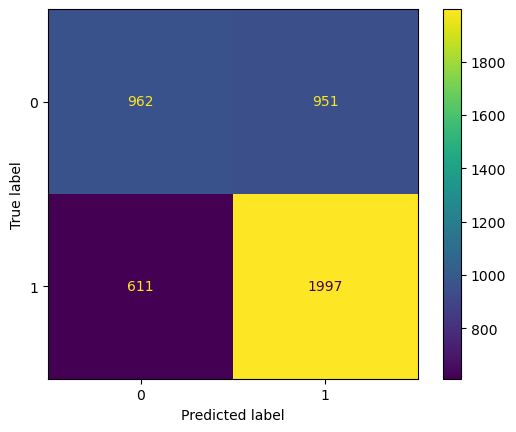

In [22]:
#Confusion Matrix
conf_mat = confusion_matrix(y_test, y_test_pred)
cm_display = ConfusionMatrixDisplay(conf_mat).plot()

In [23]:
#Look at results
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.61      0.50      0.55      1913
           1       0.68      0.77      0.72      2608

    accuracy                           0.65      4521
   macro avg       0.64      0.63      0.64      4521
weighted avg       0.65      0.65      0.65      4521



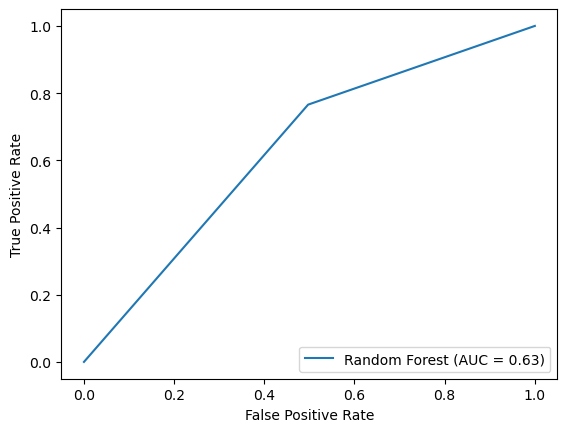

In [28]:
#ROC
from sklearn.metrics import RocCurveDisplay
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_test_pred)
roc_auc = metrics.auc(fpr, tpr)
roc_displayNB = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Random Forest')
roc_displayNB.plot()
plt.show()

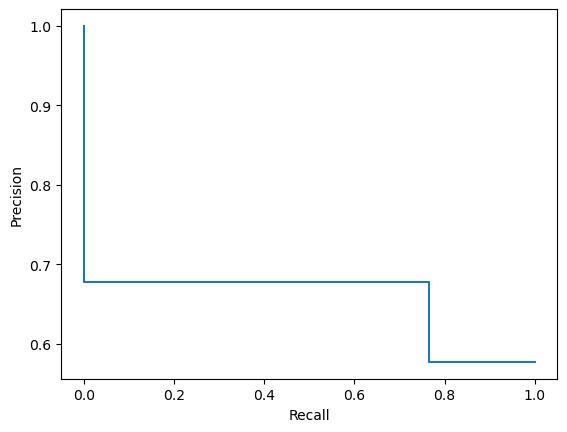

In [29]:
# Precision-Recall Curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

prec, recall, _ = precision_recall_curve(y_test, y_test_pred)
pr_displayNB = PrecisionRecallDisplay(precision=prec, recall=recall)
pr_displayNB.plot()
plt.show()

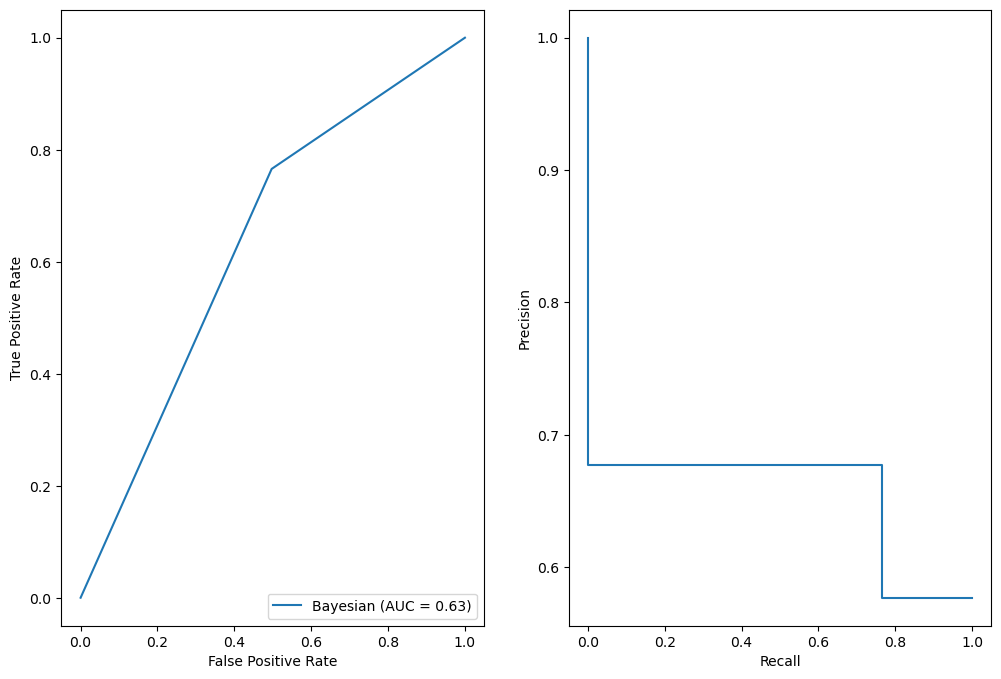

In [26]:
#See them side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
roc_displayNB.plot(ax=ax1)
pr_displayNB.plot(ax=ax2)
plt.show()